# CNR Parking Exploratory Data Analysis Notebook

This data will be prepared in preperation for training into a model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from urllib.request import urlretrieve
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

%matplotlib inline

# Datasets

CNRPark+EXT.csv (18.1 MB)

CSV collecting metadata for each patch of both CNRPark and CNR-EXT datasets

CNRPark-Patches-150x150.zip (36.6 MB)

segmented images (patches) of parking spaces belonging to the CNRPark preliminary subset.
Files follow this organization: <CAMERA>/<CLASS>/YYYYMMDD_HHMM_<SLOT_ID>.jpg, where:

<CAMERA> can be A or B,
<CLASS> can be free or busy,
YYYYMMDD_HHMM is the zero-padded 24-hour capture datetime,
<SLOT_ID> is a local ID given to the slot for that particular camera

In [2]:
# CSV file of both park_ext data
park_ext = "https://github.com/fabiocarrara/deep-parking/releases/download/archive/CNRPark+EXT.csv"

# segmented images beloning to CNR_Park subset
cnr_park = "https://github.com/fabiocarrara/deep-parking/releases/download/archive/CNR-EXT-Patches-150x150.zip"

# segmented images of for CNR_EXT subset
cnr_ext = "https://github.com/fabiocarrara/deep-parking/releases/download/archive/CNR-EXT-Patches-150x150.zip"

df = pd.read_csv(park_ext)

df.head()

<ipython-input-2-332b11c17138>:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(park_ext)


,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
0,A,20150703_0805,3,8,CNRPark/A/free/20150703_0805_1.jpg,5,7,0,1,S,2015,NaN
1,A,20150703_0810,3,8,CNRPark/A/free/20150703_0810_1.jpg,10,7,0,1,S,2015,NaN
2,A,20150703_0815,3,8,CNRPark/A/busy/20150703_0815_1.jpg,15,7,1,1,S,2015,0.0
3,A,20150703_0820,3,8,CNRPark/A/busy/20150703_0820_1.jpg,20,7,1,1,S,2015,0.0
4,A,20150703_0825,3,8,CNRPark/A/busy/20150703_0825_1.jpg,25,7,1,1,S,2015,0.0


In [3]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157549 entries, 0 to 157548
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   camera            157549 non-null  object 
 1   datetime          157549 non-null  object 
 2   day               157549 non-null  int64  
 3   hour              157549 non-null  int64  
 4   image_url         157549 non-null  object 
 5   minute            157549 non-null  int64  
 6   month             157549 non-null  int64  
 7   occupancy         157549 non-null  int64  
 8   slot_id           157549 non-null  int64  
 9   weather           157549 non-null  object 
 10  year              157549 non-null  int64  
 11  occupant_changed  87618 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 14.4+ MB


# Check for missing values

In [4]:
df.isnull().sum()

,0
camera,0
datetime,0
day,0
hour,0
image_url,0
minute,0
month,0
occupancy,0
slot_id,0
weather,0


In [5]:
df.describe()

,day,hour,minute,month,occupancy,slot_id,year,occupant_changed
count,157549.000000,157549.000000,157549.000000,157549.000000,157549.000000,157549.000000,157549.000000,87618.000000
mean,15.592343,11.817054,30.456030,7.372430,0.556544,267.114358,2015.358771,0.006106
std,6.666394,2.886789,16.538109,4.838895,0.496794,120.772005,0.479641,0.077903
min,3.000000,7.000000,0.000000,1.000000,0.000000,1.000000,2015.000000,0.000000
25%,12.000000,9.000000,17.000000,1.000000,0.000000,221.000000,2015.000000,0.000000
50%,16.000000,12.000000,30.000000,11.000000,1.000000,265.000000,2015.000000,0.000000
75%,20.000000,14.000000,47.000000,11.000000,1.000000,305.000000,2016.000000,0.000000
max,29.000000,18.000000,59.000000,12.000000,1.000000,618.000000,2016.000000,1.000000


In [6]:
data = df.dropna()

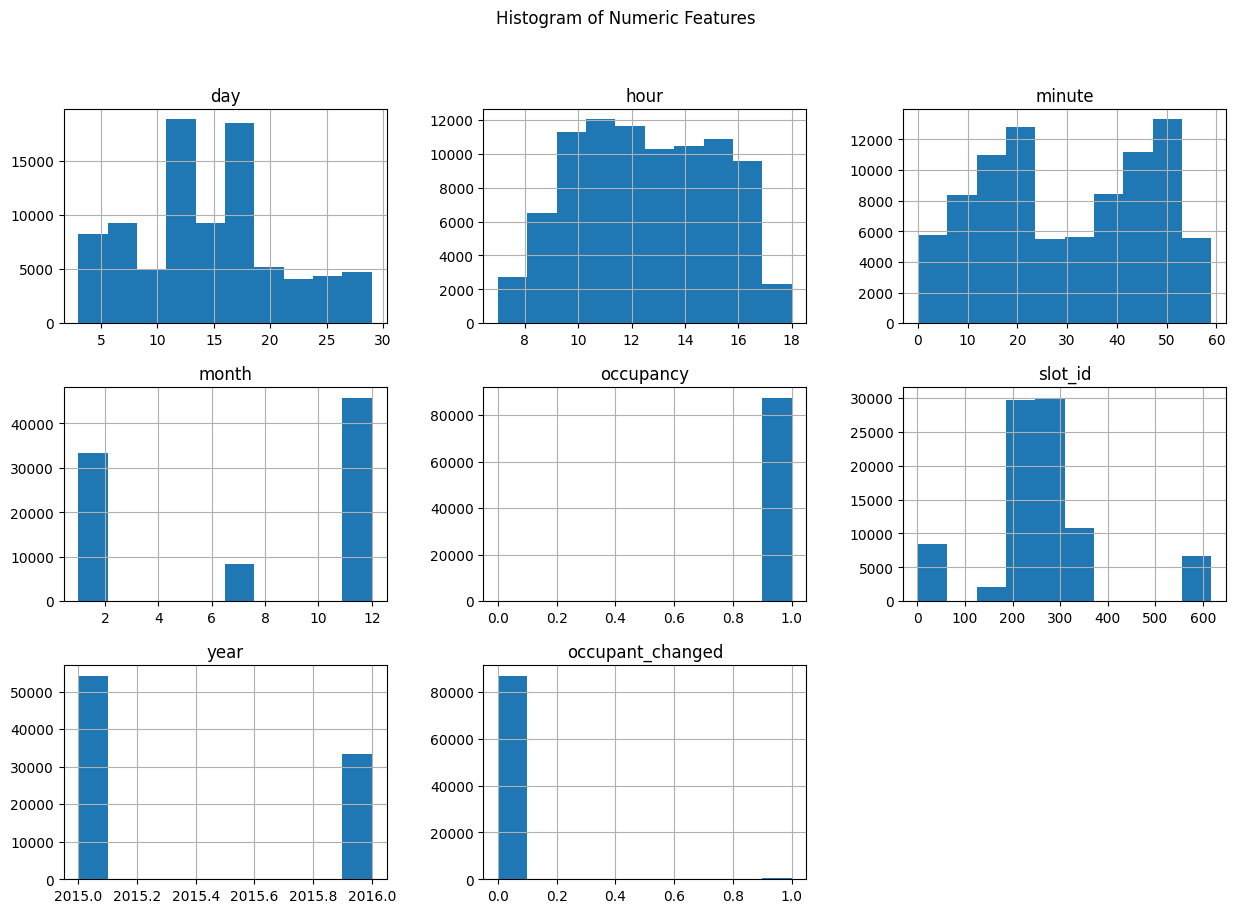

In [7]:
data.hist(figsize=(15, 10))
plt.suptitle("Histogram of Numeric Features")
plt.show()

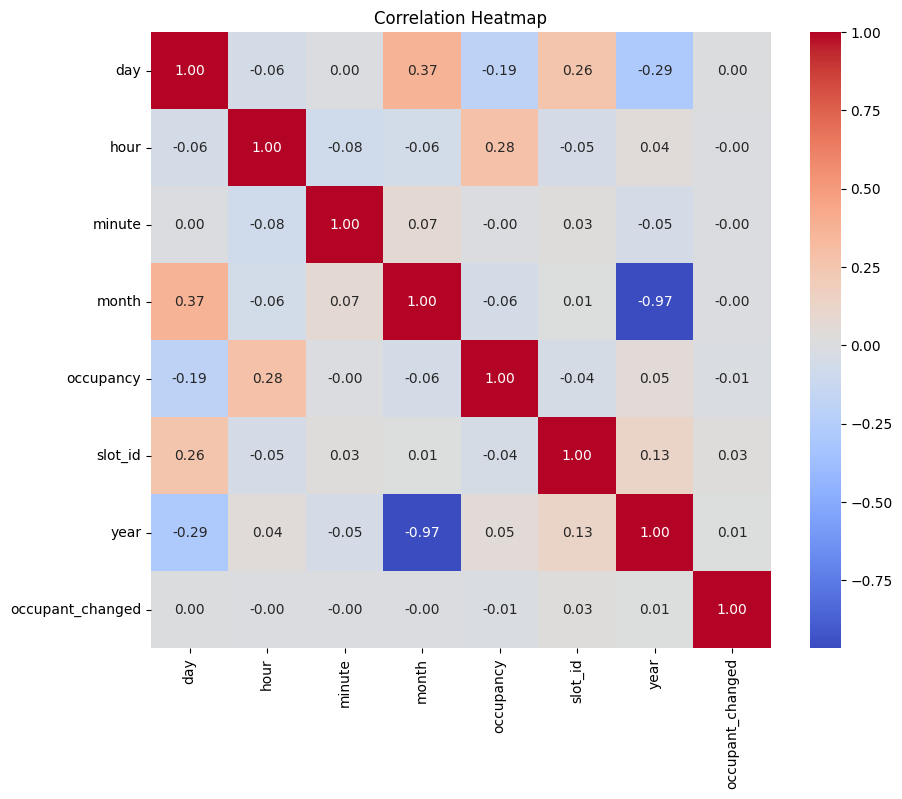

In [8]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Image Analysis and Visualization:
*   Extract Images from CNR-EXT-Patches
*   Display 5 random images
*   Sunny vs Rainy Days
*   Image Dimensions
*   RBG distribution
*   Shadow Pixels


In [9]:

# paths
zip_path = "/content/CNR-EXT-Patches-150x150.zip"
extract_path = "/content/CNR-EXT-Patches"

# Download and extract images
print("Downloading dataset...")
urlretrieve("https://github.com/fabiocarrara/deep-parking/releases/download/archive/CNR-EXT-Patches-150x150.zip", zip_path)

print("Extracting dataset...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Extracting dataset...
Dataset extracted successfully!


Total images found: 144965


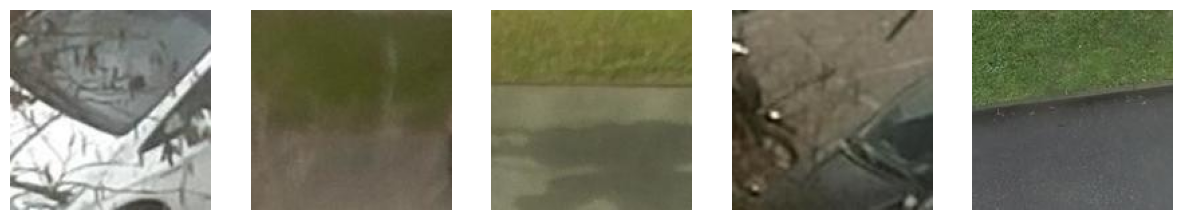

In [10]:
#Images in Patches
image_folder = "/content/CNR-EXT-Patches/PATCHES"

# list
image_paths = []
for root, _, files in os.walk(image_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

# total imahes
print(f"Total images found: {len(image_paths)}")

# 5 random images
sample_images = random.sample(image_paths, 5)

# Display images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis("off")  # Hide axis labels

plt.show()


Sunny images found: 63178
Rainy images found: 37544


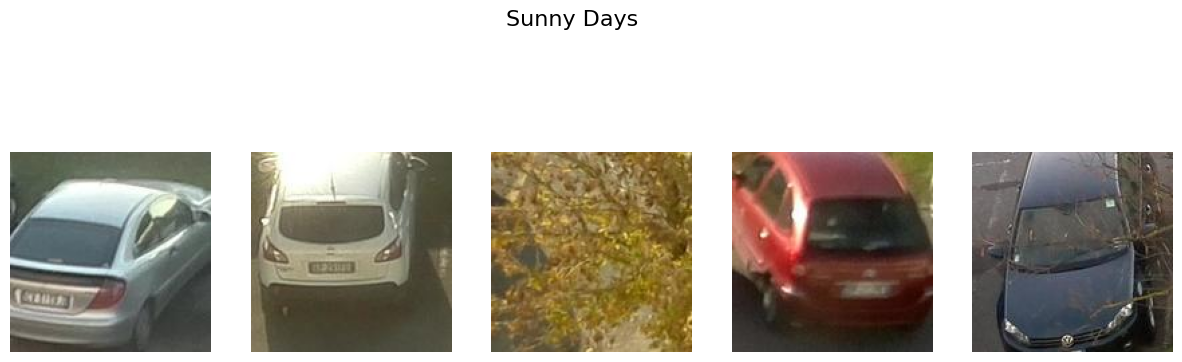

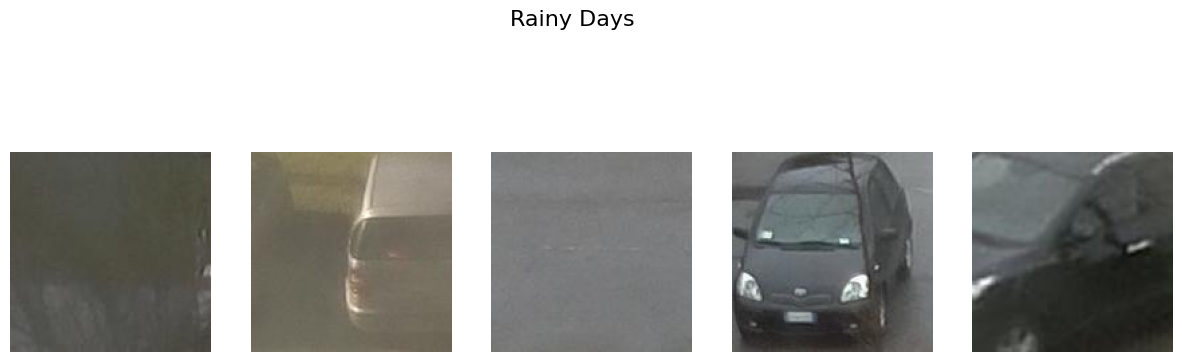

In [11]:
# Parking spaces sunny and rainy days
sunny_path = "/content/CNR-EXT-Patches/PATCHES/SUNNY"
rainy_path = "/content/CNR-EXT-Patches/PATCHES/RAINY"

# Collect images from category
def get_image_paths(base_path):
    image_paths = []
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.endswith(".jpg"):
                image_paths.append(os.path.join(root, file))
    return image_paths

sunny_images = get_image_paths(sunny_path)
rainy_images = get_image_paths(rainy_path)

# images found
print(f"Sunny images found: {len(sunny_images)}")
print(f"Rainy images found: {len(rainy_images)}")

# Select 5 random images from each category
sample_sunny = random.sample(sunny_images, 5) if len(sunny_images) >= 5 else sunny_images
sample_rainy = random.sample(rainy_images, 5) if len(rainy_images) >= 5 else rainy_images

# plot
def plot_images(image_list, title):
    fig, axes = plt.subplots(1, len(image_list), figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for i, img_path in enumerate(image_list):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis("off")
    plt.show()

# Display
plot_images(sample_sunny, "Sunny Days")
plot_images(sample_rainy, "Rainy Days")

Total images: 144965


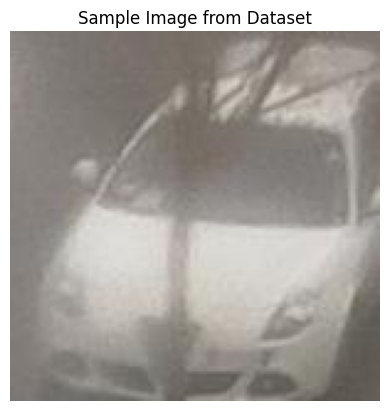

Image Dimensions: 150x150, Channels: 3


In [12]:
# all images
image_files = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

print(f"Total images: {len(image_files)}")

# sample image
sample_img = cv2.imread(image_files[0])
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(sample_img)
plt.axis("off")
plt.title("Sample Image from Dataset")
plt.show()

# Image dimensions
height, width, channels = sample_img.shape
print(f"Image Dimensions: {height}x{width}, Channels: {channels}")

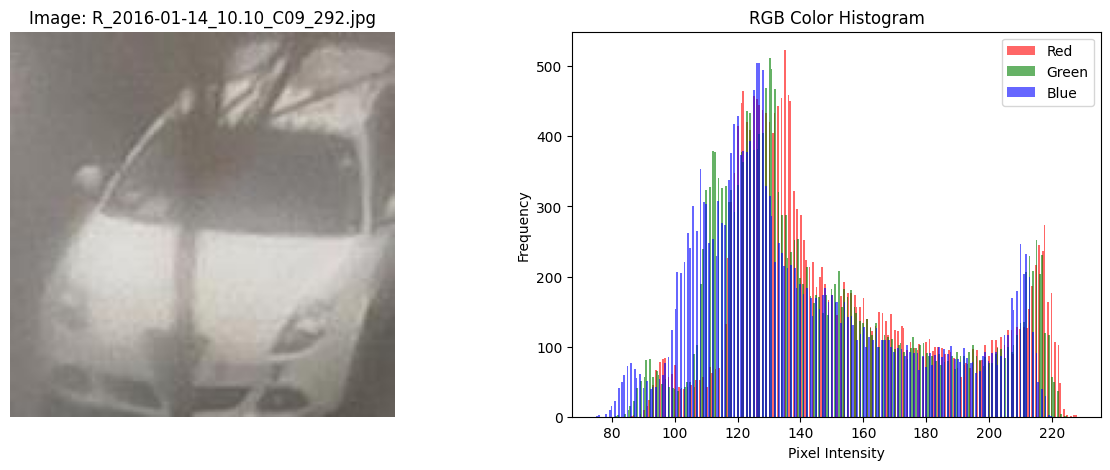

In [13]:
def plot_rgb_histogram(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the image filename for labeling
    image_name = os.path.basename(image_path)

    # Split channels
    r, g, b = cv2.split(image)

    # (Image + Histogram)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Display
    axes[0].imshow(image)
    axes[0].axis("off")
    axes[0].set_title(f"Image: {image_name}")

    # Plot
    axes[1].hist(r.ravel(), bins=256, color='red', alpha=0.6, label="Red")
    axes[1].hist(g.ravel(), bins=256, color='green', alpha=0.6, label="Green")
    axes[1].hist(b.ravel(), bins=256, color='blue', alpha=0.6, label="Blue")
    axes[1].legend()
    axes[1].set_title("RGB Color Histogram")
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")

    plt.show()

# Test
plot_rgb_histogram(image_files[0])

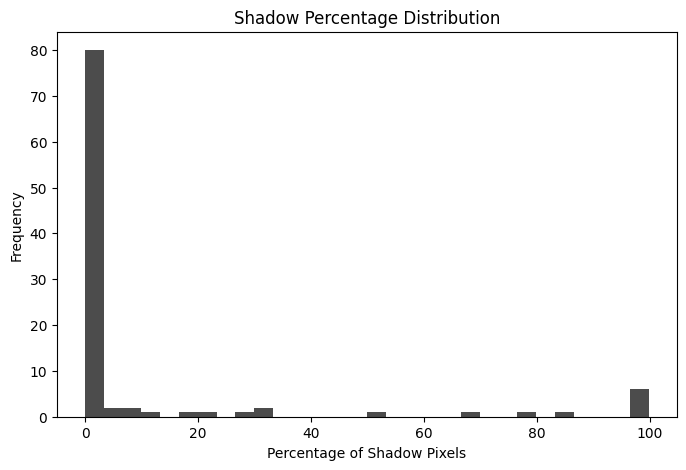

In [14]:
def calculate_shadow_percentage(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    shadow_pixels = np.sum(image < 50)  # Count dark pixels (threshold=50)
    total_pixels = image.size
    return (shadow_pixels / total_pixels) * 100  # Percentage of shadow pixels

shadow_percentages = [calculate_shadow_percentage(img) for img in image_files[:100]]

# Plot shadow distribution
plt.figure(figsize=(8, 5))
plt.hist(shadow_percentages, bins=30, color='black', alpha=0.7)
plt.title("Shadow Percentage Distribution")
plt.xlabel("Percentage of Shadow Pixels")
plt.ylabel("Frequency")
plt.show()